<a href="https://colab.research.google.com/github/Caspitaegypt/Caspitaegypt/blob/main/Bahaa_Mahmoud_TUT_Image_to_Talking_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="direction: rtl; text-align: center;"><b><span style="font-size: medium;">🔥 اشترك في قناتي علي يوتيوب للمزيد من شروحات أدوات الذكاء الإصطناعي&nbsp;</span></b><b><span style="font-size: medium;">👇👍💪</span></b></p><p style="direction: rtl; text-align: center;"><a href="https://www.youtube.com/@BahaaMahmoudTutorials" target="_blank"><b><span style="font-size: medium;">Bahaa Mahmoud TUT</span></b></a></p><div class="separator" style="clear: both; text-align: center;"><a href="https://www.youtube.com/@BahaaMahmoudTutorials" style="margin-left: 1em; margin-right: 1em;" target="_blank"><img border="0" data-original-height="1048" data-original-width="764" height="200" src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhEs3AM_9g2DGrTJqF7SNeg4kfA6_gs0-iO8iSQ4YRWTXvsHLYaK2RoWMeDycFJoi8ykWnWvEV9bBn0EEP4tpvTSt81xpekEKzkEc7vKYNVUeo8Xvb97hnS0YlarVBqBVLIcbPg2ReRF52KyvI7ncq9vsGpT1QJzu8bY0Ri-yAl_fGx_B_oF3-ckm2-h8E/s320/0715%20(1).png" width="200" /></a></div>

---

**مشروع تحويل الصورة لفيديو ناطق**

---






In [1]:
#@markdown ## الخطوة 1 : التثبيت الأساسي

#!rm -rf /content/sample_data
#!mkdir /content/sample_data

!git clone https://github.com/splendormagic/I2TV_BahaaMahmoudTUT.git

%cd /content/I2TV_BahaaMahmoudTUT

#download the pretrained model
!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/wav2lip.pth' -O 'checkpoints/wav2lip.pth'
!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/wav2lip_gan.pth' -O 'checkpoints/wav2lip_gan.pth'
!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/resnet50.pth' -O 'checkpoints/resnet50.pth'
!wget 'https://github.com/justinjohn0306/Wav2Lip/releases/download/models/mobilenet.pth' -O 'checkpoints/mobilenet.pth'
a = !pip install https://raw.githubusercontent.com/AwaleSajil/ghc/master/ghc-1.0-py3-none-any.whl
!pip install git+https://github.com/elliottzheng/batch-face.git@master

!pip install -r requirements_bahaa.txt

%run imports.py

#%run copyright.py

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data);
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});

</script>
"""


def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])

  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)

  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

#clear_output()
#print("انتهت")

Cloning into 'I2TV_BahaaMahmoudTUT'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 97 (delta 19), reused 88 (delta 10), pack-reused 0
Receiving objects: 100% (97/97), 60.47 KiB | 3.56 MiB/s, done.
Resolving deltas: 100% (19/19), done.
/content/I2TV_BahaaMahmoudTUT
--2024-07-02 22:59:25--  https://github.com/justinjohn0306/Wav2Lip/releases/download/models/wav2lip.pth
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/615543729/e18ec62e-10ae-4c65-9862-1c7a0fafe228?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20240702%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20240702T225925Z&X-Amz-Expires=300&X-Amz-Signature=a4f13b3d5b9b72a3507adda99f1305663b45ac1f6bfb7

---

/content


Saving FB_IMG_1719576182128.jpg to FB_IMG_1719576182128.jpg
Video resolution: (960, 960)
No resizing needed


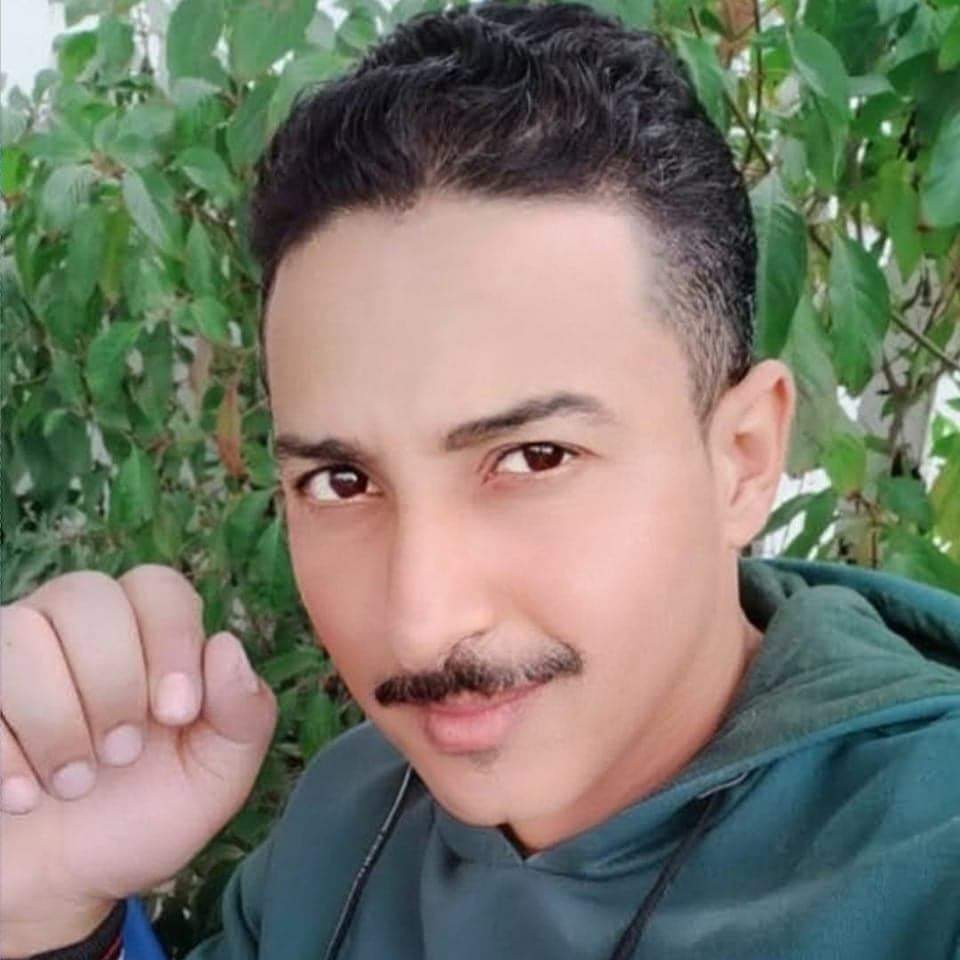

In [2]:
#@markdown ## الخطوة 2 : رفع الصورة

#@markdown * الصورة يجب ان تكون للنصف الأعلي من الجسم
#@markdown * يجب أن تكون مواجهة للكاميرا وملامح الوجه واضحة

%cd /content

if not os.path.exists('images'):
  os.makedirs('images')

#upload_method = "Upload" #@param ["Upload"]
upload_method = "Upload"

# remove previous input video
if os.path.isfile('/content/images/input_img.jpg'):
    os.remove('/content/images/input_img.jpg')

if upload_method == "Upload":
    uploaded = files.upload()
    for filename in uploaded.keys():
        os.rename(filename, '/content/images/input_img.jpg')


# Image To Video

if not os.path.exists('video'):
  os.makedirs('video')

# remove previous input video
if os.path.isfile('/content/video/input_vid.mp4'):
    os.remove('/content/video/input_vid.mp4')

def images_to_video(image_folder, output_video, image_duration):
    images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, _ = frame.shape

    fps = 24  # Set the frame rate to a standard value

    video_writer = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))

    for image in images:
        # Read each image
        img = cv2.imread(os.path.join(image_folder, image))
        # Duplicate the image to achieve the desired duration
        for _ in range(int(fps * image_duration)):
            video_writer.write(img)

    cv2.destroyAllWindows()
    video_writer.release()

# Example usage
image_folder = "/content/images"
output_video = "/content/video/input_vid.mp4"
image_duration = 1  # Duration of each image in seconds
images_to_video(image_folder, output_video, image_duration)


#Checking the video

def showVideo(file_path):
    """Function to display video in Colab"""
    mp4 = open(file_path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    display(HTML("""
    <video controls width=600>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url))

def get_video_resolution(video_path):
    """Function to get the resolution of a video"""
    import cv2
    video = cv2.VideoCapture(video_path)
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    return (width, height)

def resize_video(video_path, new_resolution):
    """Function to resize a video"""
    import cv2
    video = cv2.VideoCapture(video_path)
    fourcc = int(video.get(cv2.CAP_PROP_FOURCC))
    fps = video.get(cv2.CAP_PROP_FPS)
    width, height = new_resolution
    output_path = os.path.splitext(video_path)[0] + '_720p.mp4'
    writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    while True:
        success, frame = video.read()
        if not success:
            break
        resized_frame = cv2.resize(frame, new_resolution)
        writer.write(resized_frame)
    video.release()
    writer.release()


PATH_TO_YOUR_VIDEO = '/content/video/input_vid.mp4'

video_duration = mp.VideoFileClip(PATH_TO_YOUR_VIDEO).duration
if video_duration > 60:
    print("WARNING: Video duration exceeds 60 seconds. Please upload a shorter video.")
    raise SystemExit(0)

video_resolution = get_video_resolution(PATH_TO_YOUR_VIDEO)
print(f"Video resolution: {video_resolution}")
if video_resolution[0] >= 1920 or video_resolution[1] >= 1080:
    print("Resizing video to 720p...")
    os.system(f"ffmpeg -i {PATH_TO_YOUR_VIDEO} -vf scale=1280:720 /content/video/input_vid.mp4")
    PATH_TO_YOUR_VIDEO = "/content/video/input_vid.mp4"
    print("Video resized to 720p")
else:
    print("No resizing needed")

# Display the image
image_filename = '/content/images/input_img.jpg'

Image(filename=image_filename)

---

In [3]:
#@markdown ## الخطوة 3 : رفع الملف الصوتي

#@markdown * ملف التعليق الصوتي يجب ان يكون نقي وبدون أي موسيقي

if not os.path.exists('/content/audio'):
  os.makedirs('/content/audio')

#upload_method = 'Upload' #@param ['Upload']
upload_method = 'Upload'

#remove previous input audio
if os.path.isfile('/content/audio/input_audio.wav'):
    os.remove('/content/audio/input_audio.wav')

def displayAudio():
  display(Audio('/content/audio/input_audio.wav'))


if upload_method == 'Upload':
  from google.colab import files
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes.'.format(
        name=fn, length=len(uploaded[fn])))


  # Consider only the first file
  PATH_TO_YOUR_AUDIO = str(list(uploaded.keys())[0])

  # Load audio with specified sampling rate
  import librosa
  audio, sr = librosa.load(PATH_TO_YOUR_AUDIO, sr=None)

  # Save audio with specified sampling rate
  import soundfile as sf
  sf.write('/content/audio/input_audio.wav', audio, sr, format='wav')


#clear_output()

displayAudio()

Saving Voice_effect1717768407597.mp3 to Voice_effect1717768407597.mp3
User uploaded file "Voice_effect1717768407597.mp3" with length 12056 bytes.


  audio, sr = librosa.load(PATH_TO_YOUR_AUDIO, sr=None)

	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)



---

In [6]:
#@markdown ## الخطوة 4 : إنشاء الفيديو

#pad_top =  0#@param {type:"integer"}
pad_top =  0
pad_bottom =  10
pad_left =  0
pad_right =  0
rescaleFactor =  1
nosmooth = False

# remove previous input video
if os.path.isfile('/content/I2TV_BahaaMahmoudTUT/results/result_voice.mp4'):
    os.remove('/content/I2TV_BahaaMahmoudTUT/results/result_voice.mp4')

if nosmooth == False:
  !cd I2TV_BahaaMahmoudTUT && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "../video/input_vid.mp4" --audio "../audio/input_audio.wav" --pads $pad_top $pad_bottom $pad_left $pad_right --resize_factor $rescaleFactor
else:
  !cd I2TV_BahaaMahmoudTUT && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "../video/input_vid.mp4" --audio "../audio/input_audio.wav" --pads $pad_top $pad_bottom $pad_left $pad_right --resize_factor $rescaleFactor --nosmooth

#clear_output()

#show generated video

mp4 = open('/content/I2TV_BahaaMahmoudTUT/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

Using cpu for inference.
Load checkpoint from: checkpoints/wav2lip_gan.pth
Traceback (most recent call last):
  File "/content/I2TV_BahaaMahmoudTUT/inference.py", line 322, in <module>
    do_load(args.checkpoint_path)
  File "/content/I2TV_BahaaMahmoudTUT/inference.py", line 297, in do_load
    detector = RetinaFace(gpu_id=0, model_path="checkpoints/mobilenet.pth", network="mobilenet")
  File "/usr/local/lib/python3.10/dist-packages/batch_face/face_detection/detector.py", line 49, in __init__
    self.model = load_net(model_path, self.device, network)
  File "/usr/local/lib/python3.10/dist-packages/batch_face/face_detection/alignment.py", line 486, in load_net
    net = net.to(device)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1173, in to
    return self._apply(convert)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 779, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/mod

FileNotFoundError: [Errno 2] No such file or directory: '/content/I2TV_BahaaMahmoudTUT/results/result_voice.mp4'